# SUPERVISED LEARNING CASE STUDY
 PREDICT ROADSIDE SULPHUR DIOXIDE LEVELS GIVEN OTHER POLLUTANT VALUES/ USES STANDARD LINEAR REGRESSION AND LINEAR SUPPORT VECTOR MACHINES ALGORITHMS

# IMPORT NECESSARY MODULES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                   # a visualisation library
from matplotlib import pyplot as plt    # matplotlib visualisation library
%matplotlib inline

DATASET FEATURES : Month,London Mean Roadside Nitric Oxide (ug/m3),London Mean Roadside Nitrogen Dioxide (ug/m3),London Mean Roadside Oxides of Nitrogen (ug/m3),London Mean Roadside Ozone (ug/m3),London Mean Roadside PM10 Particulate (ug/m3),London Mean Roadside PM2.5 Particulate (ug/m3),London Mean Roadside Sulphur Dioxide (ug/m3),London Mean Background Nitric Oxide (ug/m3),London Mean Background Nitrogen Dioxide (ug/m3),London Mean Background Oxides of Nitrogen (ug/m3),London Mean Background Ozone (ug/m3),London Mean Background PM10 Particulate (ug/m3),London Mean Background PM2.5 Particulate (ug/m3),London Mean Background Sulphur Dioxide (ug/m3).

In [2]:
data = pd.read_csv('Air quality monthly entries.csv') # load the data set into a dataFrame

In [3]:
data.columns # visualising the dataframe columns

Index(['Month', 'London Mean Roadside Nitric Oxide (ug/m3)',
       'London Mean Roadside Nitrogen Dioxide (ug/m3)',
       'London Mean Roadside Oxides of Nitrogen (ug/m3)',
       'London Mean Roadside Ozone (ug/m3)',
       'London Mean Roadside PM10 Particulate (ug/m3)',
       'London Mean Roadside PM2.5 Particulate (ug/m3)',
       'London Mean Roadside Sulphur Dioxide (ug/m3)',
       'London Mean Background Nitric Oxide (ug/m3)',
       'London Mean Background Nitrogen Dioxide (ug/m3)',
       'London Mean Background Oxides of Nitrogen (ug/m3)',
       'London Mean Background Ozone (ug/m3)',
       'London Mean Background PM10 Particulate (ug/m3)',
       'London Mean Background PM2.5 Particulate (ug/m3)',
       'London Mean Background Sulphur Dioxide (ug/m3)'],
      dtype='object')

In [4]:
data.dtypes # returns the datatype of each column

Month                                                 object
London Mean Roadside Nitric Oxide (ug/m3)            float64
London Mean Roadside Nitrogen Dioxide (ug/m3)        float64
London Mean Roadside Oxides of Nitrogen (ug/m3)      float64
London Mean Roadside Ozone (ug/m3)                   float64
London Mean Roadside PM10 Particulate (ug/m3)        float64
London Mean Roadside PM2.5 Particulate (ug/m3)       float64
London Mean Roadside Sulphur Dioxide (ug/m3)         float64
London Mean Background Nitric Oxide (ug/m3)          float64
London Mean Background Nitrogen Dioxide (ug/m3)      float64
London Mean Background Oxides of Nitrogen (ug/m3)    float64
London Mean Background Ozone (ug/m3)                 float64
London Mean Background PM10 Particulate (ug/m3)      float64
London Mean Background PM2.5 Particulate (ug/m3)     float64
London Mean Background Sulphur Dioxide (ug/m3)       float64
dtype: object

In [5]:
data.shape # returns the shape of data

(132, 15)

In [6]:
data.describe() # Obtain information on the dataset, taking into account the mean and mix/max values for each column.

,London Mean Roadside Nitric Oxide (ug/m3),London Mean Roadside Nitrogen Dioxide (ug/m3),London Mean Roadside Oxides of Nitrogen (ug/m3),London Mean Roadside Ozone (ug/m3),London Mean Roadside PM10 Particulate (ug/m3),London Mean Roadside PM2.5 Particulate (ug/m3),London Mean Roadside Sulphur Dioxide (ug/m3),London Mean Background Nitric Oxide (ug/m3),London Mean Background Nitrogen Dioxide (ug/m3),London Mean Background Oxides of Nitrogen (ug/m3),London Mean Background Ozone (ug/m3),London Mean Background PM10 Particulate (ug/m3),London Mean Background PM2.5 Particulate (ug/m3),London Mean Background Sulphur Dioxide (ug/m3)
count,108.000000,132.000000,108.000000,132.000000,132.000000,132.000000,132.000000,108.000000,132.000000,108.000000,132.000000,132.000000,128.000000,132.000000
mean,78.339254,55.757291,139.490022,27.173816,25.122292,15.715170,3.262744,22.122995,34.864790,56.383385,36.894533,19.272478,13.292726,3.362393
std,28.466425,7.902649,31.601333,8.396838,5.191290,4.891652,1.494524,14.311697,8.498108,21.973580,11.386670,4.676902,4.523476,0.990090
min,27.211156,38.950403,82.235139,10.658199,16.284946,7.897849,-1.686945,4.172043,20.050417,25.642083,13.869489,11.926882,6.394624,1.079167
25%,60.433804,49.122043,117.582400,21.084761,21.664651,12.520632,2.404772,12.002621,28.102621,39.180444,28.959935,16.187778,9.860652,2.727352
50%,72.407863,55.706519,131.843578,26.372782,23.986160,14.333468,3.232594,17.329740,33.893983,51.886816,36.434152,18.175000,12.011022,3.267809
75%,99.704847,61.770027,163.112344,33.915764,27.821734,18.111300,4.033429,30.134337,41.197235,69.291375,45.986033,21.511425,15.207539,4.030007
max,180.933333,75.922414,250.743414,46.266129,43.314919,32.580780,8.540566,79.245296,60.237069,129.152285,62.561828,36.932661,29.912366,6.734195


In [7]:
data.duplicated() # Check for duplicated values

0      False
1      False
2      False
3      False
4      False
       ...  
127    False
128    False
129    False
130    False
131    False
Length: 132, dtype: bool

In [8]:
data.head(10)

,Month,London Mean Roadside Nitric Oxide (ug/m3),London Mean Roadside Nitrogen Dioxide (ug/m3),London Mean Roadside Oxides of Nitrogen (ug/m3),London Mean Roadside Ozone (ug/m3),London Mean Roadside PM10 Particulate (ug/m3),London Mean Roadside PM2.5 Particulate (ug/m3),London Mean Roadside Sulphur Dioxide (ug/m3),London Mean Background Nitric Oxide (ug/m3),London Mean Background Nitrogen Dioxide (ug/m3),London Mean Background Oxides of Nitrogen (ug/m3),London Mean Background Ozone (ug/m3),London Mean Background PM10 Particulate (ug/m3),London Mean Background PM2.5 Particulate (ug/m3),London Mean Background Sulphur Dioxide (ug/m3)
0,2008-01-01,NaN,55.502688,NaN,29.512097,24.969086,14.678763,4.217742,NaN,42.338710,NaN,36.942204,18.817204,NaN,3.572581
1,2008-02-01,NaN,75.922414,NaN,20.317529,39.477011,28.772989,7.553161,NaN,60.237069,NaN,26.425287,31.896552,NaN,6.734195
2,2008-03-01,NaN,55.610215,NaN,40.103495,21.569892,12.300135,3.868280,NaN,39.801075,NaN,50.227151,15.477151,NaN,2.286290
3,2008-04-01,NaN,61.756944,NaN,37.884722,28.740278,20.461111,4.475000,NaN,44.009722,NaN,50.133333,21.729167,NaN,3.236111
4,2008-05-01,NaN,62.903226,NaN,46.266129,34.611559,27.508065,4.634409,NaN,44.141129,NaN,60.512097,29.545699,16.576826,4.250000
5,2008-06-01,NaN,49.161111,NaN,39.836111,23.198611,16.010057,3.593056,NaN,31.241667,NaN,51.326389,18.250000,12.613764,2.547222
6,2008-07-01,NaN,48.444892,NaN,34.982527,22.958333,14.240591,3.100806,NaN,31.216398,NaN,46.623656,17.204301,11.899194,2.493280
7,2008-08-01,NaN,41.072581,NaN,30.021505,20.693548,11.452957,2.155914,NaN,27.850806,NaN,37.094086,15.508065,11.201379,2.088710
8,2008-09-01,NaN,54.080556,NaN,22.375000,28.227778,17.979167,3.748611,NaN,41.215278,NaN,28.886111,22.244444,15.324513,3.056944
9,2008-10-01,NaN,56.658602,NaN,19.337366,23.002688,12.918011,4.305108,NaN,43.813172,NaN,25.427419,16.469086,11.620968,2.838710


In [9]:
data.isnull().sum()

Month                                                 0
London Mean Roadside Nitric Oxide (ug/m3)            24
London Mean Roadside Nitrogen Dioxide (ug/m3)         0
London Mean Roadside Oxides of Nitrogen (ug/m3)      24
London Mean Roadside Ozone (ug/m3)                    0
London Mean Roadside PM10 Particulate (ug/m3)         0
London Mean Roadside PM2.5 Particulate (ug/m3)        0
London Mean Roadside Sulphur Dioxide (ug/m3)          0
London Mean Background Nitric Oxide (ug/m3)          24
London Mean Background Nitrogen Dioxide (ug/m3)       0
London Mean Background Oxides of Nitrogen (ug/m3)    24
London Mean Background Ozone (ug/m3)                  0
London Mean Background PM10 Particulate (ug/m3)       0
London Mean Background PM2.5 Particulate (ug/m3)      4
London Mean Background Sulphur Dioxide (ug/m3)        0
dtype: int64

In [10]:
# fill the missing values in numerical variables with the mean value of that column

data['London Mean Roadside Nitric Oxide (ug/m3)'] = data['London Mean Roadside Nitric Oxide (ug/m3)'].fillna(data['London Mean Roadside Nitric Oxide (ug/m3)'].mean())
data['London Mean Roadside Oxides of Nitrogen (ug/m3)'] = data['London Mean Roadside Oxides of Nitrogen (ug/m3)'].fillna(data['London Mean Roadside Oxides of Nitrogen (ug/m3)'].mean())
data['London Mean Background Nitric Oxide (ug/m3)'] = data['London Mean Background Nitric Oxide (ug/m3)'].fillna(data['London Mean Background Nitric Oxide (ug/m3)'].mean())
data['London Mean Background Oxides of Nitrogen (ug/m3)'] = data['London Mean Background Oxides of Nitrogen (ug/m3)'].fillna(data['London Mean Background Oxides of Nitrogen (ug/m3)'].mean())
data['London Mean Background PM2.5 Particulate (ug/m3)'] = data['London Mean Background PM2.5 Particulate (ug/m3)'].fillna(data['London Mean Background PM2.5 Particulate (ug/m3)'].mean())

In [11]:
data.isnull().sum()

Month                                                0
London Mean Roadside Nitric Oxide (ug/m3)            0
London Mean Roadside Nitrogen Dioxide (ug/m3)        0
London Mean Roadside Oxides of Nitrogen (ug/m3)      0
London Mean Roadside Ozone (ug/m3)                   0
London Mean Roadside PM10 Particulate (ug/m3)        0
London Mean Roadside PM2.5 Particulate (ug/m3)       0
London Mean Roadside Sulphur Dioxide (ug/m3)         0
London Mean Background Nitric Oxide (ug/m3)          0
London Mean Background Nitrogen Dioxide (ug/m3)      0
London Mean Background Oxides of Nitrogen (ug/m3)    0
London Mean Background Ozone (ug/m3)                 0
London Mean Background PM10 Particulate (ug/m3)      0
London Mean Background PM2.5 Particulate (ug/m3)     0
London Mean Background Sulphur Dioxide (ug/m3)       0
dtype: int64

# To reduce the number of features, I will to obtain the mean values between roadside and background entries and create a new feature to display the value of the pollutant.

In [12]:
data['London Nitric Oxide'] = (data['London Mean Roadside Nitric Oxide (ug/m3)'] + data['London Mean Background Nitric Oxide (ug/m3)'])/2
data['London Nitrogen Dioxide'] = (data['London Mean Roadside Nitrogen Dioxide (ug/m3)'] + data['London Mean Background Nitrogen Dioxide (ug/m3)'])/2
data['London Oxides of Nitrogen'] = (data['London Mean Roadside Oxides of Nitrogen (ug/m3)'] + data['London Mean Background Oxides of Nitrogen (ug/m3)'])/2
data['London Ozone'] = (data['London Mean Roadside Ozone (ug/m3)'] + data['London Mean Background Ozone (ug/m3)'])/2
data['London PM10 Particulate'] = (data['London Mean Roadside PM10 Particulate (ug/m3)'] + data['London Mean Background PM10 Particulate (ug/m3)'])/2
data['London PM2.5 Particulate'] = (data['London Mean Roadside PM2.5 Particulate (ug/m3)'] + data['London Mean Background PM2.5 Particulate (ug/m3)'])/2
data['London Sulphur Dioxide'] = (data['London Mean Roadside Sulphur Dioxide (ug/m3)'] + data['London Mean Background Sulphur Dioxide (ug/m3)'])/2

In [13]:
data.head(10)

,Month,London Mean Roadside Nitric Oxide (ug/m3),London Mean Roadside Nitrogen Dioxide (ug/m3),London Mean Roadside Oxides of Nitrogen (ug/m3),London Mean Roadside Ozone (ug/m3),London Mean Roadside PM10 Particulate (ug/m3),London Mean Roadside PM2.5 Particulate (ug/m3),London Mean Roadside Sulphur Dioxide (ug/m3),London Mean Background Nitric Oxide (ug/m3),London Mean Background Nitrogen Dioxide (ug/m3),...,London Mean Background PM10 Particulate (ug/m3),London Mean Background PM2.5 Particulate (ug/m3),London Mean Background Sulphur Dioxide (ug/m3),London Nitric Oxide,London Nitrogen Dioxide,London Oxides of Nitrogen,London Ozone,London PM10 Particulate,London PM2.5 Particulate,London Sulphur Dioxide
0,2008-01-01,78.339254,55.502688,139.490022,29.512097,24.969086,14.678763,4.217742,22.122995,42.338710,...,18.817204,13.292726,3.572581,50.231125,48.920699,97.936703,33.227151,21.893145,13.985745,3.895161
1,2008-02-01,78.339254,75.922414,139.490022,20.317529,39.477011,28.772989,7.553161,22.122995,60.237069,...,31.896552,13.292726,6.734195,50.231125,68.079741,97.936703,23.371408,35.686782,21.032857,7.143678
2,2008-03-01,78.339254,55.610215,139.490022,40.103495,21.569892,12.300135,3.868280,22.122995,39.801075,...,15.477151,13.292726,2.286290,50.231125,47.705645,97.936703,45.165323,18.523522,12.796430,3.077285
3,2008-04-01,78.339254,61.756944,139.490022,37.884722,28.740278,20.461111,4.475000,22.122995,44.009722,...,21.729167,13.292726,3.236111,50.231125,52.883333,97.936703,44.009028,25.234722,16.876918,3.855556
4,2008-05-01,78.339254,62.903226,139.490022,46.266129,34.611559,27.508065,4.634409,22.122995,44.141129,...,29.545699,16.576826,4.250000,50.231125,53.522177,97.936703,53.389113,32.078629,22.042445,4.442204
5,2008-06-01,78.339254,49.161111,139.490022,39.836111,23.198611,16.010057,3.593056,22.122995,31.241667,...,18.250000,12.613764,2.547222,50.231125,40.201389,97.936703,45.581250,20.724306,14.311911,3.070139
6,2008-07-01,78.339254,48.444892,139.490022,34.982527,22.958333,14.240591,3.100806,22.122995,31.216398,...,17.204301,11.899194,2.493280,50.231125,39.830645,97.936703,40.803091,20.081317,13.069892,2.797043
7,2008-08-01,78.339254,41.072581,139.490022,30.021505,20.693548,11.452957,2.155914,22.122995,27.850806,...,15.508065,11.201379,2.088710,50.231125,34.461694,97.936703,33.557796,18.100806,11.327168,2.122312
8,2008-09-01,78.339254,54.080556,139.490022,22.375000,28.227778,17.979167,3.748611,22.122995,41.215278,...,22.244444,15.324513,3.056944,50.231125,47.647917,97.936703,25.630556,25.236111,16.651840,3.402778
9,2008-10-01,78.339254,56.658602,139.490022,19.337366,23.002688,12.918011,4.305108,22.122995,43.813172,...,16.469086,11.620968,2.838710,50.231125,50.235887,97.936703,22.382392,19.735887,12.269489,3.571909


# We want to drop the roadside/background columns and we will only be using their mean to measure the overall pollutant levels of the environment.

In [14]:
data = data.drop(['Month'],axis=1) # Useless feature for prediction

In [15]:
data = data.drop(['London Mean Roadside Nitric Oxide (ug/m3)'],axis=1)
data = data.drop(['London Mean Roadside Nitrogen Dioxide (ug/m3)'],axis=1)
data = data.drop(['London Mean Roadside Ozone (ug/m3)'],axis=1)
data = data.drop(['London Mean Roadside PM10 Particulate (ug/m3)'],axis=1)
data = data.drop(['London Mean Roadside PM2.5 Particulate (ug/m3)'],axis=1)
data = data.drop(['London Mean Roadside Sulphur Dioxide (ug/m3)'],axis=1)
data = data.drop(['London Mean Roadside Oxides of Nitrogen (ug/m3)'],axis=1)
data = data.drop(['London Mean Background Oxides of Nitrogen (ug/m3)'],axis=1)
data = data.drop(['London Mean Background Nitrogen Dioxide (ug/m3)'],axis=1)
data = data.drop(['London Mean Background PM10 Particulate (ug/m3)'],axis=1)
data = data.drop(['London Mean Background PM2.5 Particulate (ug/m3)'],axis=1)
data = data.drop(['London Mean Background Sulphur Dioxide (ug/m3)'],axis=1)
data = data.drop(['London Mean Background Ozone (ug/m3)'],axis=1)
data = data.drop(['London Mean Background Nitric Oxide (ug/m3)'],axis=1)

In [16]:
data.head(10)

,London Nitric Oxide,London Nitrogen Dioxide,London Oxides of Nitrogen,London Ozone,London PM10 Particulate,London PM2.5 Particulate,London Sulphur Dioxide
0,50.231125,48.920699,97.936703,33.227151,21.893145,13.985745,3.895161
1,50.231125,68.079741,97.936703,23.371408,35.686782,21.032857,7.143678
2,50.231125,47.705645,97.936703,45.165323,18.523522,12.796430,3.077285
3,50.231125,52.883333,97.936703,44.009028,25.234722,16.876918,3.855556
4,50.231125,53.522177,97.936703,53.389113,32.078629,22.042445,4.442204
5,50.231125,40.201389,97.936703,45.581250,20.724306,14.311911,3.070139
6,50.231125,39.830645,97.936703,40.803091,20.081317,13.069892,2.797043
7,50.231125,34.461694,97.936703,33.557796,18.100806,11.327168,2.122312
8,50.231125,47.647917,97.936703,25.630556,25.236111,16.651840,3.402778
9,50.231125,50.235887,97.936703,22.382392,19.735887,12.269489,3.571909


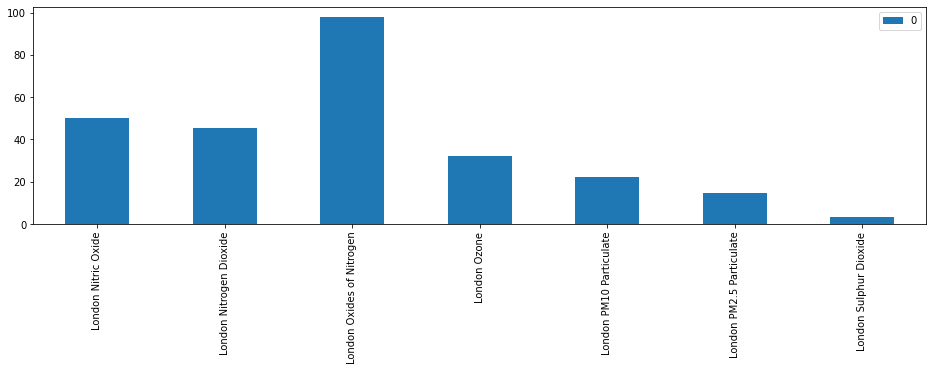

In [17]:
df_mean_values = pd.DataFrame(data=data.mean(axis=0))
ax = df_mean_values.plot.bar(figsize=(16, 4), rot=90)

# Visualizing our data set

C:\Users\DI_ma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


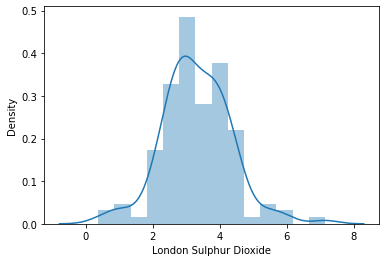

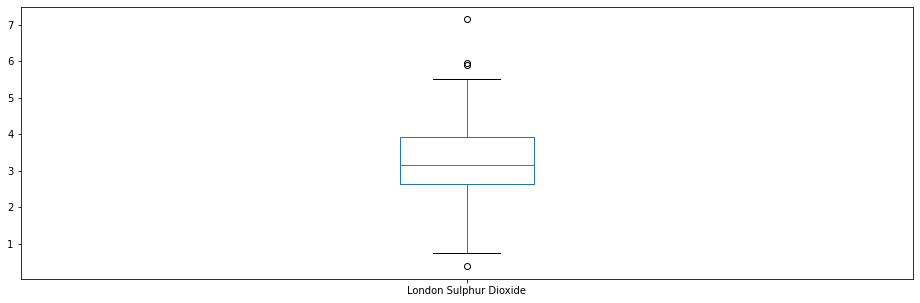

In [18]:
sns.distplot(data['London Sulphur Dioxide']) # Similarly, we can visualise the distribution of the numerical variables of my independent variable
plt.show()
data['London Sulphur Dioxide'].plot.box(figsize=(16,5))
plt.show()

C:\Users\DI_ma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


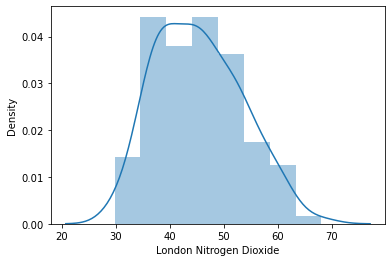

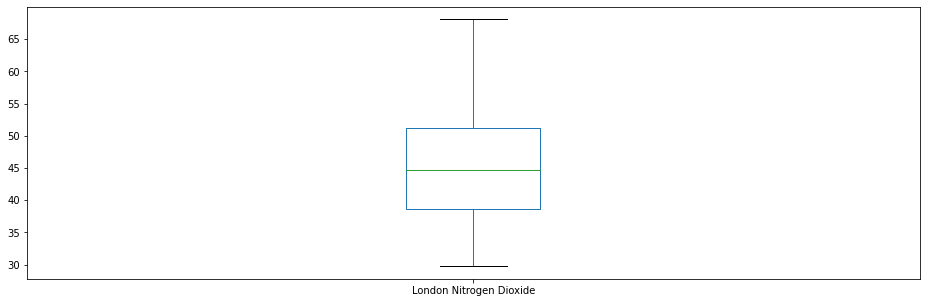

In [19]:
sns.distplot(data['London Nitrogen Dioxide']) # Similarly, we can visualise the distribution of the numerical variables of my independent variable
plt.show()
data['London Nitrogen Dioxide'].plot.box(figsize=(16,5))
plt.show()

### We can perform normalisation using log transformation

In [20]:
data['London Nitric Oxide'] = np.log(data['London Nitric Oxide'])
data['London Nitrogen Dioxide'] = np.log(data['London Nitrogen Dioxide'])
data['London Oxides of Nitrogen'] = np.log(data['London Oxides of Nitrogen'])
data['London Ozone'] = np.log(data['London Ozone'])
data['London PM10 Particulate'] = np.log(data['London PM10 Particulate'])
data['London PM2.5 Particulate'] = np.log(data['London PM2.5 Particulate'])
data['London Sulphur Dioxide'] = np.log(data['London Sulphur Dioxide'])

In [74]:
data.head(30)

,London Nitric Oxide,London Nitrogen Dioxide,London Oxides of Nitrogen,London PM10 Particulate,London PM2.5 Particulate
0,3.916635,3.890201,4.584321,3.086174,2.638039
1,3.916635,4.220680,4.584321,3.574780,3.046086
2,3.916635,3.865050,4.584321,2.919041,2.549166
3,3.916635,3.968088,4.584321,3.228221,2.825947
4,3.916635,3.980096,4.584321,3.468190,3.092970
5,3.916635,3.693902,4.584321,3.031307,2.661092
6,3.916635,3.684637,4.584321,2.999790,2.570311
7,3.916635,3.539848,4.584321,2.895956,2.427204
8,3.916635,3.863839,4.584321,3.228276,2.812521
9,3.916635,3.916730,4.584321,2.982439,2.507116


# Correlation Matrix

In [22]:
corr=data.corr() # gives us the correlation values

<AxesSubplot:>

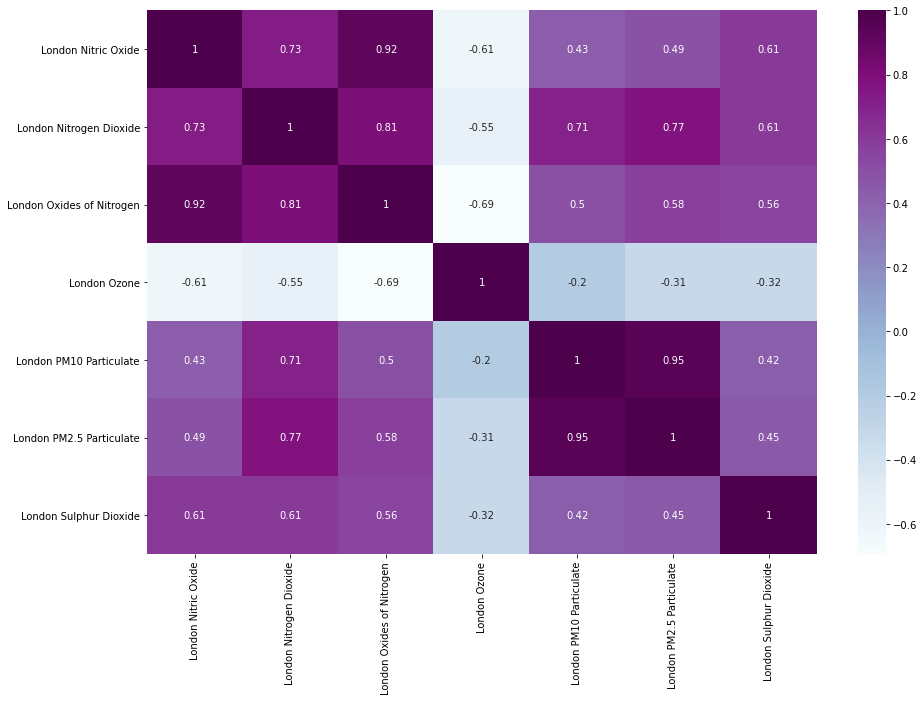

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")  # let's visualise the correlation matrix

In [24]:
data= data.drop(['London Ozone'],axis=1)
data= data.drop(['London Sulphur Dioxide'],axis=1)

In [25]:
X = data.drop(['London Nitrogen Dioxide'],axis=1)
y = data['London Nitrogen Dioxide']

In [26]:
from sklearn.model_selection import train_test_split

In [71]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy is: ', model.score(x_test,y_test)*100)
    score = cross_val_score(model,x,y,cv=6)                  # we set the number of folds to 5
    print('Cross validation Accuaracy: ', np.mean(score)*100)

In [72]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
classify(LR_model, X,y)

Accuracy is:  81.75020417886746
Cross validation Accuaracy:  64.84631542614873


In [73]:
from sklearn.svm import SVR
SVR_model = SVR()
classify(SVR_model, X,y)

Accuracy is:  83.57651124570415
Cross validation Accuaracy:  62.30699793585421
